In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inbreast-roi-mammography/description.csv
/kaggle/input/inbreast-roi-mammography/images/22671003_f571fd4e63c718e3_MG_L_ML_ANON.png
/kaggle/input/inbreast-roi-mammography/images/30011850_4f20c1285d8f0b1f_MG_R_ML_ANON.png
/kaggle/input/inbreast-roi-mammography/images/30011530_349323117bf0fd93_MG_R_ML_ANON.png
/kaggle/input/inbreast-roi-mammography/images/22614379_d065adcb9905b973_MG_L_CC_ANON.png
/kaggle/input/inbreast-roi-mammography/images/50994137_cc9e66c5b31baab8_MG_R_ML_ANON.png
/kaggle/input/inbreast-roi-mammography/images/24055464_ac3185e18ffdc7b6_MG_R_ML_ANON.png
/kaggle/input/inbreast-roi-mammography/images/20587518_d571b5880ad2a016_MG_L_ML_ANON.png
/kaggle/input/inbreast-roi-mammography/images/24065887_c01f83a1eb283270_MG_L_CC_ANON.png
/kaggle/input/inbreast-roi-mammography/images/50996083_71c1a60d57c5322f_MG_R_ML_ANON.png
/kaggle/input/inbreast-roi-mammography/images/22613944_f23fa352e7de3dc7_MG_L_CC_ANON.png
/kaggle/input/inbreast-roi-mammography/images/50999148_

In [2]:
data=pd.read_csv(r"/kaggle/input/inbreast-roi-mammography/description.csv")

In [3]:
data.head()

,Patient id,Patient age,Laterality,View,Acquisition date,File name,Acr,Bi-rads,Mass,Micros,Distortion,Asymmetry,Findings notes (in portuguese),Other notes,Lesion annotation status,Pectoral muscle annotation,Other annotations,Path,Cancer,Path_save
0,removed,removed,R,CC,201001,22678622,4,1,NaN,NaN,NaN,NaN,normal,NaN,NO ANNOTATION (NORMAL),NaN,NaN,22678622_61b13c59bcba149e_MG_R_CC_ANON.png,0,images/22678622_61b13c59bcba149e_MG_R_CC_ANON.png
1,removed,removed,L,CC,201001,22678646,4,3,X,NaN,NaN,NaN,nódulo,NaN,CANCER,NaN,NaN,22678646_61b13c59bcba149e_MG_L_CC_ANON.png,1,images/22678646_61b13c59bcba149e_MG_L_CC_ANON.png
2,removed,removed,R,MLO,201001,22678670,4,1,NaN,NaN,NaN,NaN,normal,NaN,NO ANNOTATION (NORMAL),NaN,NaN,22678670_61b13c59bcba149e_MG_R_ML_ANON.png,0,images/22678670_61b13c59bcba149e_MG_R_ML_ANON.png
3,removed,removed,L,MLO,201001,22678694,4,3,X,NaN,NaN,NaN,nódulo,NaN,CANCER,NaN,NaN,22678694_61b13c59bcba149e_MG_L_ML_ANON.png,1,images/22678694_61b13c59bcba149e_MG_L_ML_ANON.png
4,removed,removed,R,CC,201001,22614074,2,5,X,X,NaN,NaN,nódulo QSE + micros,NaN,CANCER,NaN,NaN,22614074_6bd24a0a42c19ce1_MG_R_CC_ANON.png,1,images/22614074_6bd24a0a42c19ce1_MG_R_CC_ANON.png


In [4]:
#lets check if the data is balanced?
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use("fivethirtyeight")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
data.shape

(410, 20)

<Axes: >

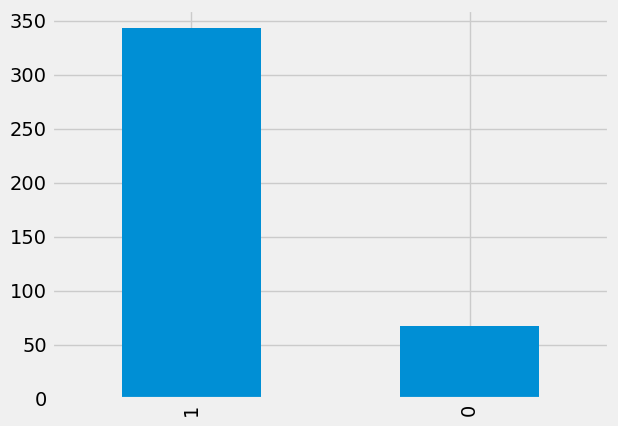

In [6]:
data["Cancer"].value_counts().plot.bar()

In [7]:
#data is kinda imbalance lets see how it works

In [8]:
import cv2

(224, 224)


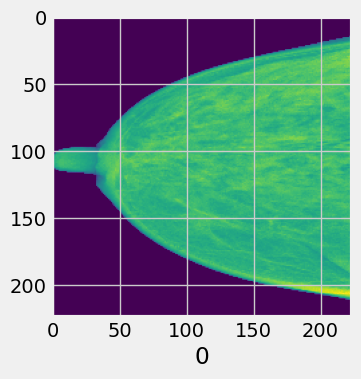

(224, 224)


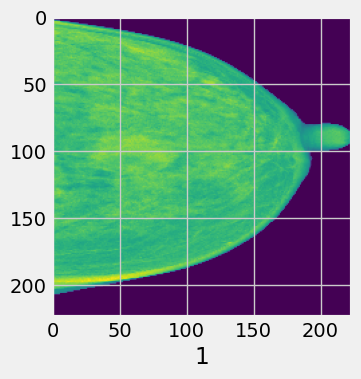

(224, 224)


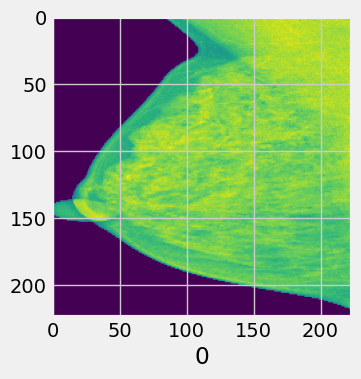

(224, 224)


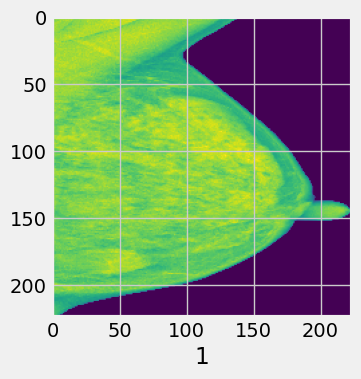

(224, 224)


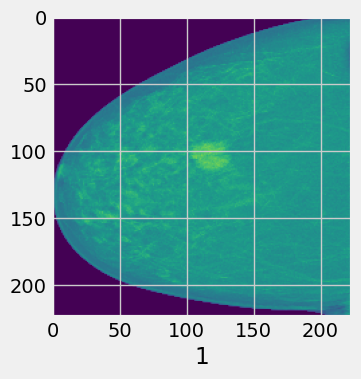

In [9]:
X=[]
y=[]
for i in range(5):
    plt.figure(figsize=(20,5))
    image=plt.imread("/kaggle/input/inbreast-roi-mammography/"+data.loc[i,"Path_save"])
    image=cv2.resize(image,(224,224))
    label=data.loc[i,"Cancer"]
    
    
    plt.subplot(1,5,i+1)
    #plt.imshow(image,cmap='gray')
    plt.imshow(image)
    print(image.shape)
    plt.xlabel(label)
    plt.show()
    

In [10]:
X=[]
y=[]

for i in range(data.shape[0]):
    img=cv2.imread("/kaggle/input/inbreast-roi-mammography/"+data.loc[i,"Path_save"])
    
    img=cv2.resize(img,(224,224))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    X.append(img)
    label=data.loc[i,"Cancer"]
    y.append(label)
    

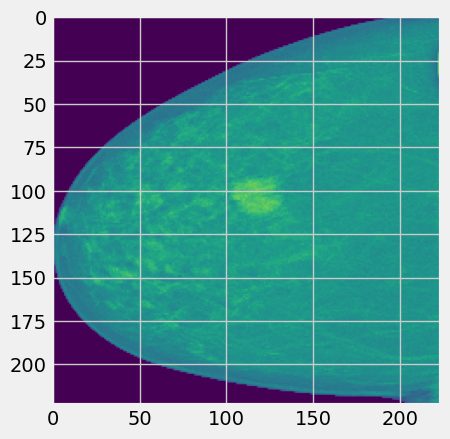

In [11]:
import cv2
#plt.axis("off")
plt.imshow(image)
plt.show()

In [12]:
X=np.array(X)
y=np.array(y)

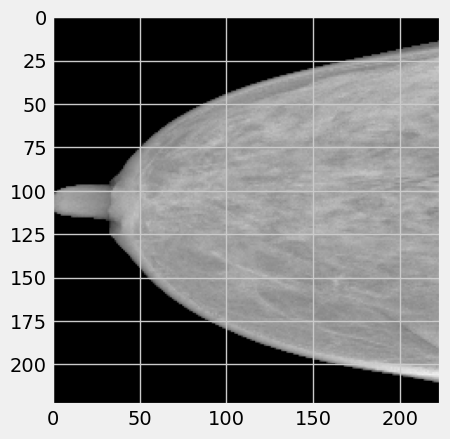

In [13]:
plt.imshow(X[0])

In [14]:
import cv2

#### flipping the images

In [15]:
flipped_X,flipped_y=[],[]

In [16]:
for i in range(X.shape[0]):
    img=cv2.flip(X[i],1)
    flipped_X.append(img)
    flipped_y.append(y[i])

Text(0.5, 1.0, '0')

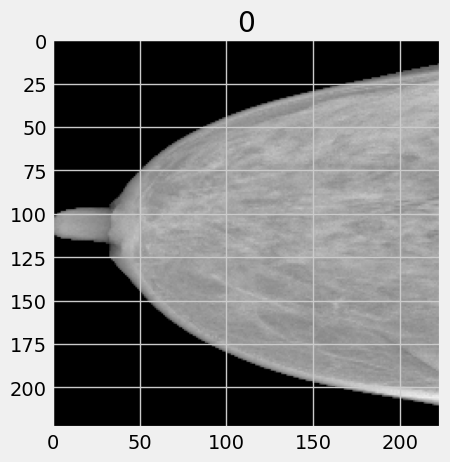

In [17]:
plt.imshow(X[0])
plt.title(y[0])

Text(0.5, 1.0, '0')

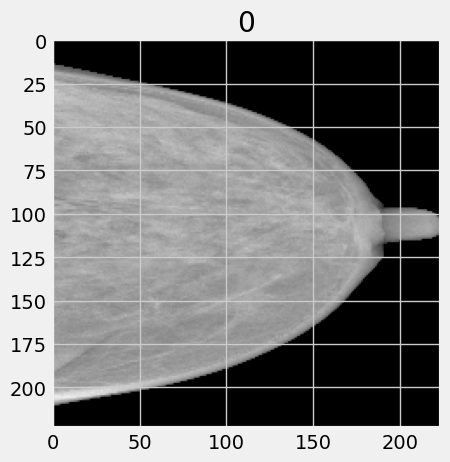

In [18]:
plt.imshow(flipped_X[0])
plt.title(flipped_y[0])

### guassian blur images

In [19]:
gblur_X,gblur_y=[],[]

In [20]:
for i in range(X.shape[0]):
    img=cv2.GaussianBlur(X[i], (5, 5), sigmaX=0)
    gblur_X.append(img)
    gblur_y.append(y[i])

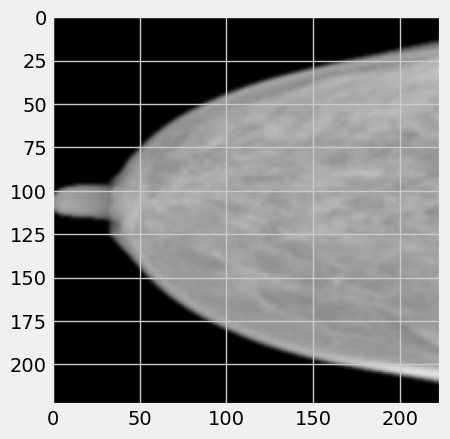

In [21]:
plt.imshow(gblur_X[0])

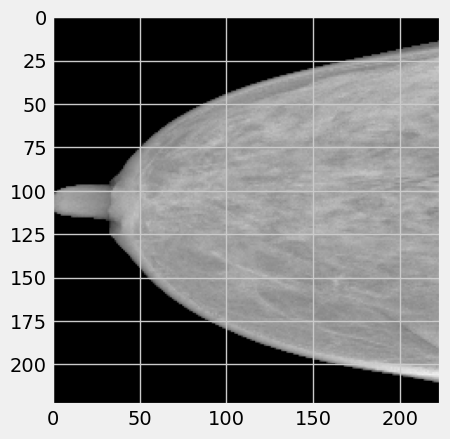

In [22]:
plt.imshow(X[0])

#### Applying jitter

In [23]:
def color_jitter(image, brightness_factor=0.5, contrast_factor=0.5, saturation_factor=0.5):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv_image[:, :, 2] = np.clip(hsv_image[:, :, 2] * brightness_factor, 0, 255)
    hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * contrast_factor, 0, 255)
    hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_factor, 0, 255)
    jittered_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    return jittered_image

# Example usage
jittered_image = color_jitter(X[0], brightness_factor=1.2, contrast_factor=2.0, saturation_factor=2.0)


In [24]:
jitter_X,jitter_y=[],[]


In [25]:
for i in range(X.shape[0]):
    img=color_jitter(X[i],brightness_factor=1.5, contrast_factor=2.0, saturation_factor=2.0)
    jitter_X.append(img)
    jitter_y.append(y[i])

Text(0.5, 1.0, '0')

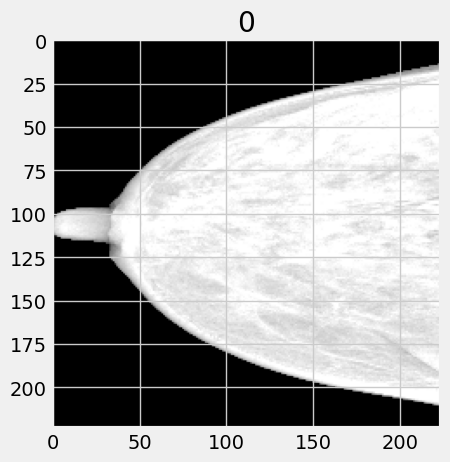

In [26]:
plt.imshow(jitter_X[0])
plt.title(jitter_y[0])

In [27]:
flipped_X=np.array(flipped_X)


In [28]:
flipped_y=np.array(flipped_y)
gblur_X=np.array(gblur_X)
gblur_y=np.array(gblur_y)
jitter_X=np.array(jitter_X)
jitter_y=np.array(jitter_y)

In [29]:
final_X=np.concatenate([X,flipped_X,gblur_X,jitter_X],axis=0)
final_y=np.concatenate([y,flipped_y,gblur_y,jitter_y],axis=0)

In [30]:
#### spliting the data

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

In [32]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=123)

In [33]:

for train_index,test_index in split.split(final_X,final_y):
    train=final_X[train_index]
    test=final_X[test_index]
    train_y=final_y[train_index]
    test_y=final_y[test_index]

In [34]:
train.shape,test.shape,train_y.shape,test_y.shape

((1312, 224, 224, 3), (328, 224, 224, 3), (1312,), (328,))

NOISE REDUCTION

#### model 1

In [35]:

 #model 1
 epochs = 40
 model = tf.keras.Sequential()
 model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, activation='relu', input_shape = (224,224,3)))
 model.add(tf.keras.layers.BatchNormalization())
 model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
 #model.add(tf.keras.layers.Dropout(0.25))

 model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, activation='relu'))
 model.add(tf.keras.layers.BatchNormalization())
 model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
 # model.add(tf.keras.layers.Dropout(0.25))

 model.add(tf.keras.layers.Flatten())
 model.add(tf.keras.layers.Dense(64, activation='relu'))
 model.add(tf.keras.layers.Dropout(0.5))

 model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()


NameError: name 'tf' is not defined

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train,train_y,epochs=25)

In [ ]:
def threshold(y,thre=0.5):
    ypred=[1 if i>=0.5 else 0 for i in y]
    return ypred

In [ ]:
from sklearn.metrics import accuracy_score
# accuracy_score(model.predict(test),test_y)
ypred=model.predict(test)
ypred=threshold(ypred)
accuracy_score(ypred,test_y)


In [ ]:
#history = model.fit(train,train_y,epochs=25)
# history = model.fit(train, train_y, epochs=epochs, validation_data=(test, test_y), verbose=1)

In [ ]:
# test[0,:].shape

#### model 2

In [ ]:

 model = tf.keras.Sequential()

# # Must define the input shape in the first layer of the neural network
 model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(224,224,3)))
 model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
 model.add(tf.keras.layers.Dropout(0.45))

 model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
 model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
 model.add(tf.keras.layers.Dropout(0.25))
 model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
 model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
 model.add(tf.keras.layers.Dropout(0.25))

 model.add(tf.keras.layers.Flatten())

 model.add(tf.keras.layers.Dense(512, activation='relu'))
 model.add(tf.keras.layers.Dropout(0.15))
 model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# # Take a look at the model summary
 model.summary() 


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#history = model.fit(train,train_y,epochs=25)
history = model.fit(train, train_y, epochs=epochs, verbose=1)

In [ ]:
ypred=model.predict(test)
ypred=threshold(ypred)
accuracy_score(ypred,test_y)

#### model 3

In [ ]:

#No Mpooling layers
epochs = 20
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (224,224,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train, train_y, epochs=epochs, verbose=1)

In [ ]:
ypred=model.predict(test)
ypred=threshold(ypred)
accuracy_score(ypred,test_y)

### model 4

In [ ]:
#history = model.fit(train,train_y,epochs=25)
history = model.fit(train, train_y, epochs=epochs, validation_data=(test, test_y), verbose=1)

In [ ]:
#Alexnet 2
epochs = 20
model = tf.keras.Sequential()
data_augmentation,
model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=2, strides=(4, 4), activation="relu",input_shape=(224, 224, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=2,strides=(1, 1), activation="relu",padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3),strides=(1, 1), activation="relu",padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3),strides=(1, 1), activation="relu",padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3),strides=(1, 1), activation="relu", padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2))) 
model.add(tf.keras.layers.Flatten())   
model.add(tf.keras.layers.Dense(4096, activation='relu')  )
model.add(tf.keras.layers.Dense(4096, activation='relu')  ) 
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  
model.summary()
    

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train, train_y, epochs=epochs, validation_data=(test, test_y), verbose=1)

**Model 5**

In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(256,256,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train, train_y, epochs=epochs, validation_data=(test, test_y), verbose=1)

In [ ]:
import tensorflow.keras as K
import tensorflow as tf

**MODEL 6-RESNET**

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.applications import ResNet50

In [ ]:
resnet_model = Sequential()
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='softmax'))

In [ ]:
resnet_model.summary()

In [ ]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
#epochs=10
#history = resnet_model.fit(
 # train,
  #train_y,
  #epochs=epochs
#)

history = resnet_model.fit(train,train_y,epochs=30)

In [ ]:
predict=resnet_model.predict(test)

In [ ]:
threshold=0.4
predicitions=[0 if i<threshold else 1 for i in predict]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(predicitions,test_y)

In [ ]:
from keras import layers
from keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools


In [ ]:
""""
BATCH_SIZE = 16

# Using original generator
train_generator = ImageDataGenerator(
        zoom_range=2,  # set range for random zoom
        rotation_range = 90,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
    )

**model 7 -densenet**

In [ ]:
def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='softmax'))
    
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )
    
    return model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train, train_y, epochs=epochs, validation_data=(test, test_y), verbose=1)

**DenseNet201**

In [ ]:
K.clear_session()
gc.collect()

resnet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

epochs = 20
model = build_model(resnet ,lr = 1e-4)
model.summary()

In [ ]:
""""
# Learning Rate Reducer
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
""""
history = model.fit(
    train_generator.flow(train, train_y),
    steps_per_epoch=train.shape[0] / BATCH_SIZE,
    epochs=10,
    validation_data=(test, test_y),
    #callbacks=[learn_control, checkpoint]
)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train, train_y, epochs=epochs, validation_data=(test, test_y), verbose=1)

In [ ]:
""""
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
#plot_learningCurve(history, epochs)

In [ ]:
""""
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
epochs = range(1,11)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
""""
from keras.applications import VGG16

# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet')
pretrained_model.summary()

**VGG16**

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model

_input = Input((224,224,3)) 

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(256, activation="relu")(flat)
dense2 = Dense(256, activation="relu")(dense1)
output = Dense(1, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)


In [ ]:
vgg16_model.summary()

In [ ]:
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = vgg16_model.fit(train,train_y,epochs=35)

In [ ]:

predict=vgg16_model.predict(test)

**VGG-16- 1**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="softmax")) 

print(model.summary())


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,train_y,epochs=30)

In [ ]:
 #model.evaluate(X_test_scaled,y_test)
#model.evaluate(test,test_y)

In [ ]:
predict=model.predict(test)

In [ ]:
threshold=0.4
predicitions=[0 if i<threshold else 1 for i in predict]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(predicitions,test_y)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train,train_y,epochs=35)

In [ ]:
predict=model.predict(test)

In [ ]:
threshold=0.4
predicitions=[0 if i<threshold else 1 for i in predict]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(predicitions,test_y)

In [ ]:
### prediction on single value

In [ ]:
test[0,:].shape

In [ ]:
pred=model.predict(np.expand_dims(test[1], axis=0))

In [ ]:
if pred<0.5:
    print(0)
else:
    print(1)

In [ ]:
test_y[1]

****SQUEEZENET MODEL****

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Concatenate, \
     MaxPool2D, GlobalAvgPool2D, Activation,Flatten
def fire_block(x, squeeze_filters, expand_filters):
    squeezed = Conv2D(filters=squeeze_filters,
                      kernel_size=1,
                      activation='relu')(x)
    expanded_1x1 = Conv2D(filters=expand_filters,
                        kernel_size=1,
                        activation='relu')(squeezed)
    expanded_3x3 = Conv2D(filters=expand_filters,
                        kernel_size=3,
                        padding='same',
                        activation='relu')(squeezed)
 
    output = Concatenate()([expanded_1x1, expanded_3x3])
    return output
 
input = Input([224, 224, 3])
 
x = Conv2D(96, 7, strides=2, padding='same', activation='relu')(input)
x = MaxPool2D(3, strides=2, padding='same')(x)
 
x = fire_block(x, squeeze_filters=16, expand_filters=64)
x = fire_block(x, squeeze_filters=16, expand_filters=64)
x = fire_block(x, squeeze_filters=32, expand_filters=128)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
x = fire_block(x, squeeze_filters=32, expand_filters=128)
x = fire_block(x, squeeze_filters=48, expand_filters=192)
x = fire_block(x, squeeze_filters=48, expand_filters=192)
x = fire_block(x, squeeze_filters=64, expand_filters=256)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
 
x = fire_block(x, squeeze_filters=64, expand_filters=256)
 
x = Conv2D(filters=1, kernel_size=1)(x)
x = GlobalAvgPool2D()(x)
output = Activation('softmax')(x)
 
from tensorflow.keras import Model
model = Model(input, output) 

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import time
start = time.time()

In [ ]:
history = model.fit(train, train_y, epochs=20, validation_data=(test, test_y), verbose=1)

In [ ]:
end = time.time()
print("Time to train the model normal way", end - start)


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='sequential_model.png')

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Tuning the parameters

In [ ]:
import numpy as np
import tensorflow.keras.backend as K
int(np.sum([K.count_params(p) for p in model.trainable_weights]))
     

In [ ]:
predict=model.predict(test)

In [ ]:
threshold=0.4
predicitions=[0 if i<threshold else 1 for i in predict]
test[0,:].shape


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(predicitions,test_y)

In [ ]:
pred=model.predict(np.expand_dims(test[1], axis=0))

In [ ]:
if pred<0.5:
    print(0)
else:
    print(1)


In [ ]:
test_y[1]

In [ ]:
print(history.history.keys())
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)